# What drives the price of a car?

![](images/kurt.jpeg)

**OVERVIEW**

In this application, you will explore a dataset from kaggle. The original dataset contained information on 3 million used cars. The provided dataset contains information on 426K cars to ensure speed of processing.  Your goal is to understand what factors make a car more or less expensive.  As a result of your analysis, you should provide clear recommendations to your client -- a used car dealership -- as to what consumers value in a used car.

### CRISP-DM Framework

<center>
    <img src = images/crisp.png width = 50%/>
</center>


To frame the task, throughout our practical applications we will refer back to a standard process in industry for data projects called CRISP-DM.  This process provides a framework for working through a data problem.  Your first step in this application will be to read through a brief overview of CRISP-DM [here](https://mo-pcco.s3.us-east-1.amazonaws.com/BH-PCMLAI/module_11/readings_starter.zip).  After reading the overview, answer the questions below.

### Business Understanding

From a business perspective, we are tasked with identifying key drivers for used car prices.  In the CRISP-DM overview, we are asked to convert this business framing to a data problem definition.  Using a few sentences, reframe the task as a data task with the appropriate technical vocabulary. 

A group of used car dealers want to understand what drives the price of used cars. We have a dataset of 426K cars to do our analysis and will provide a recommendation upon completion.

### Data Understanding

After considering the business understanding, we want to get familiar with our data.  Write down some steps that you would take to get to know the dataset and identify any quality issues within.  Take time to get to know the dataset and explore what information it contains and how this could be used to inform your business understanding.

In [2]:
import pandas as pd
import numpy as np
import matplotlib
import warnings
import seaborn as sns
import statsmodels
import matplotlib.pyplot as plt
from sklearn.linear_model import (BayesianRidge, Lasso, LassoCV, LinearRegression, Ridge, RidgeCV)
from sklearn import preprocessing
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler, PolynomialFeatures, LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.inspection import permutation_importance
from sklearn.model_selection import (GridSearchCV, KFold, StratifiedKFold, cross_val_score, train_test_split)
from tqdm import tqdm
from sklearn.impute import KNNImputer
import category_encoders as ce


### Data Preparation

After our initial exploration and fine tuning of the business understanding, it is time to construct our final dataset prior to modeling.  Here, we want to make sure to handle any integrity issues and cleaning, the engineering of new features, any transformations that we believe should happen (scaling, logarithms, normalization, etc.), and general preparation for modeling with `sklearn`. 

In [3]:
cars = pd.read_csv('vehicles.csv')
cars.head()

,id,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,VIN,drive,size,type,paint_color,state
0,7222695916,prescott,6000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,az
1,7218891961,fayetteville,11900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ar
2,7221797935,florida keys,21000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,fl
3,7222270760,worcester / central MA,1500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ma
4,7210384030,greensboro,4900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,nc


In [4]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 426880 entries, 0 to 426879
Data columns (total 18 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            426880 non-null  int64  
 1   region        426880 non-null  object 
 2   price         426880 non-null  int64  
 3   year          425675 non-null  float64
 4   manufacturer  409234 non-null  object 
 5   model         421603 non-null  object 
 6   condition     252776 non-null  object 
 7   cylinders     249202 non-null  object 
 8   fuel          423867 non-null  object 
 9   odometer      422480 non-null  float64
 10  title_status  418638 non-null  object 
 11  transmission  424324 non-null  object 
 12  VIN           265838 non-null  object 
 13  drive         296313 non-null  object 
 14  size          120519 non-null  object 
 15  type          334022 non-null  object 
 16  paint_color   296677 non-null  object 
 17  state         426880 non-null  object 
dtypes: f

In [5]:
cars.isna().sum()

id                   0
region               0
price                0
year              1205
manufacturer     17646
model             5277
condition       174104
cylinders       177678
fuel              3013
odometer          4400
title_status      8242
transmission      2556
VIN             161042
drive           130567
size            306361
type             92858
paint_color     130203
state                0
dtype: int64

In [6]:
cars.dropna(inplace=True, subset=['year', 'transmission', 'model', 'fuel', 'title_status', 'odometer'])

In [7]:
cars.fillna('unknown', inplace=True)

In [8]:
cars.drop_duplicates(inplace=True)

In [9]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 405594 entries, 27 to 426879
Data columns (total 18 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            405594 non-null  int64  
 1   region        405594 non-null  object 
 2   price         405594 non-null  int64  
 3   year          405594 non-null  float64
 4   manufacturer  405594 non-null  object 
 5   model         405594 non-null  object 
 6   condition     405594 non-null  object 
 7   cylinders     405594 non-null  object 
 8   fuel          405594 non-null  object 
 9   odometer      405594 non-null  float64
 10  title_status  405594 non-null  object 
 11  transmission  405594 non-null  object 
 12  VIN           405594 non-null  object 
 13  drive         405594 non-null  object 
 14  size          405594 non-null  object 
 15  type          405594 non-null  object 
 16  paint_color   405594 non-null  object 
 17  state         405594 non-null  object 
dtypes: 

In [10]:
#drop VIN, id, and size
cars.drop('VIN', inplace = True, axis = 1)
cars.drop('id', inplace = True, axis = 1)
cars.drop('size', inplace = True, axis = 1)

In [11]:
#convert numerical data to integers
cars['cylinders'] = pd.to_numeric(cars['cylinders'].str.replace(' cylinders', ''), errors='coerce')
cars['year'] = cars['year'].astype(int)
cars['odometer'] = cars['odometer'].astype(int)

In [12]:
cars.convert_dtypes().info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 405594 entries, 27 to 426879
Data columns (total 15 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   region        405594 non-null  string
 1   price         405594 non-null  Int64 
 2   year          405594 non-null  Int64 
 3   manufacturer  405594 non-null  string
 4   model         405594 non-null  string
 5   condition     405594 non-null  string
 6   cylinders     235501 non-null  Int64 
 7   fuel          405594 non-null  string
 8   odometer      405594 non-null  Int64 
 9   title_status  405594 non-null  string
 10  transmission  405594 non-null  string
 11  drive         405594 non-null  string
 12  type          405594 non-null  string
 13  paint_color   405594 non-null  string
 14  state         405594 non-null  string
dtypes: Int64(4), string(11)
memory usage: 51.1 MB


In [13]:
cars = cars[~cars['price'].eq(0)]

In [14]:
cars.head(50)

,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,drive,type,paint_color,state
27,auburn,33590,2014,gmc,sierra 1500 crew cab slt,good,8.0,gas,57923,clean,other,unknown,pickup,white,al
28,auburn,22590,2010,chevrolet,silverado 1500,good,8.0,gas,71229,clean,other,unknown,pickup,blue,al
29,auburn,39590,2020,chevrolet,silverado 1500 crew,good,8.0,gas,19160,clean,other,unknown,pickup,red,al
30,auburn,30990,2017,toyota,tundra double cab sr,good,8.0,gas,41124,clean,other,unknown,pickup,red,al
31,auburn,15000,2013,ford,f-150 xlt,excellent,6.0,gas,128000,clean,automatic,rwd,truck,black,al
32,auburn,27990,2012,gmc,sierra 2500 hd extended cab,good,8.0,gas,68696,clean,other,4wd,pickup,black,al
33,auburn,34590,2016,chevrolet,silverado 1500 double,good,6.0,gas,29499,clean,other,4wd,pickup,silver,al
34,auburn,35000,2019,toyota,tacoma,excellent,6.0,gas,43000,clean,automatic,4wd,truck,grey,al
35,auburn,29990,2016,chevrolet,colorado extended cab,good,6.0,gas,17302,clean,other,4wd,pickup,red,al
36,auburn,38590,2011,chevrolet,corvette grand sport,good,8.0,gas,30237,clean,other,rwd,other,red,al


In [15]:
#split features into numerical and categorical 
numerical_features = ['year', 'cylinders', 'odometer']
categorical_features = ['manufacturer','condition']
print(f"The numerical features in cars dataset are: {numerical_features}")
print(f"The categorical features in cars dataset are: {categorical_features}")

The numerical features in cars dataset are: ['year', 'cylinders', 'odometer']
The categorical features in cars dataset are: ['manufacturer', 'condition']


In [16]:
iqr = cars['price'].quantile(.8) - cars['price'].quantile(.2)
lower = cars['price'].quantile(.2) - 1.5*iqr
upper = cars['price'].quantile(.8) + 1.5*iqr
cars_price_outliers = cars.loc[(cars['price'] <= lower) | (cars['price'] >= upper)]
cars = cars.loc[(cars['price'] > lower) & (cars['price'] < upper)]

In [17]:
iqr = cars['odometer'].quantile(.8) - cars['odometer'].quantile(.2)
lower = cars['odometer'].quantile(.2) - 1.5*iqr
upper = cars['odometer'].quantile(.8) + 1.5*iqr
cars_price_outliers = cars.loc[(cars['odometer'] <= lower) | (cars['odometer'] >= upper)]
cars = cars.loc[(cars['odometer'] > lower) & (cars['odometer'] < upper)]

In [18]:
#shape of data
cars.shape

(369915, 15)

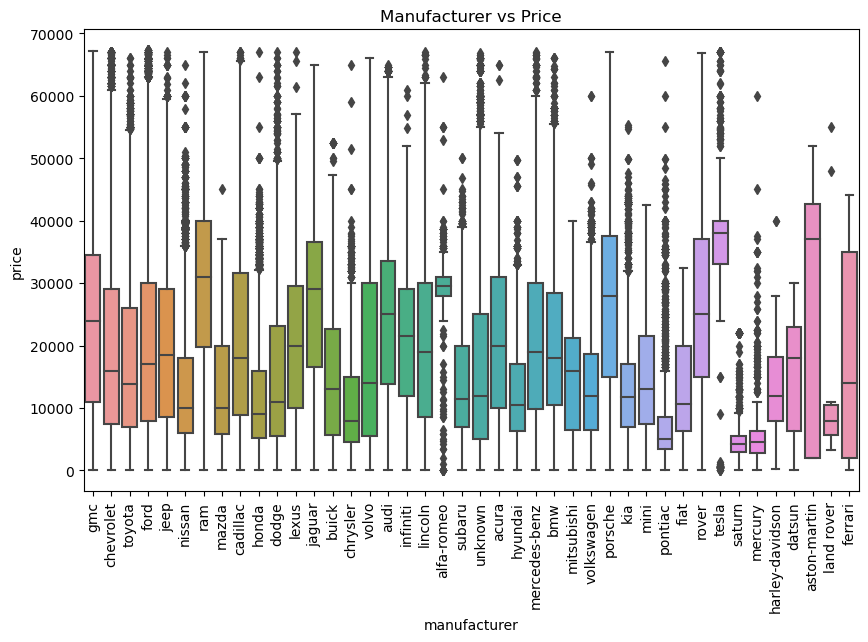

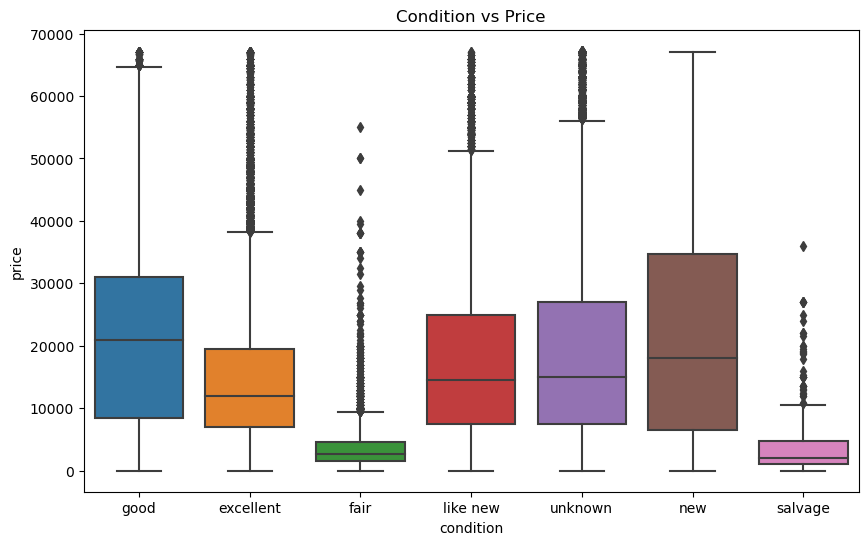

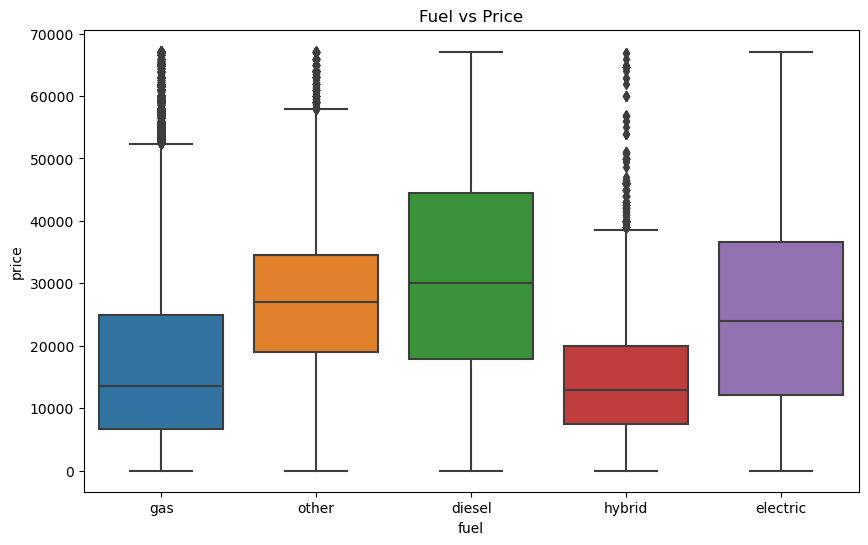

In [19]:
# Visualize Manufacturer vs Price
plt.figure(figsize=(10, 6))
sns.boxplot(x='manufacturer', y='price', data=cars)
plt.title('Manufacturer vs Price')
plt.xticks(rotation=90)  # Rotate x-axis labels
plt.show()

# Visualize Condition vs Price
plt.figure(figsize=(10, 6))
sns.boxplot(x='condition', y='price', data=cars)
plt.title('Condition vs Price')
plt.show()

# Visualize Fuel vs Price
plt.figure(figsize=(10, 6))
sns.boxplot(x='fuel', y='price', data=cars)
plt.title('Fuel vs Price')
plt.show()


IndexError: pop from empty list

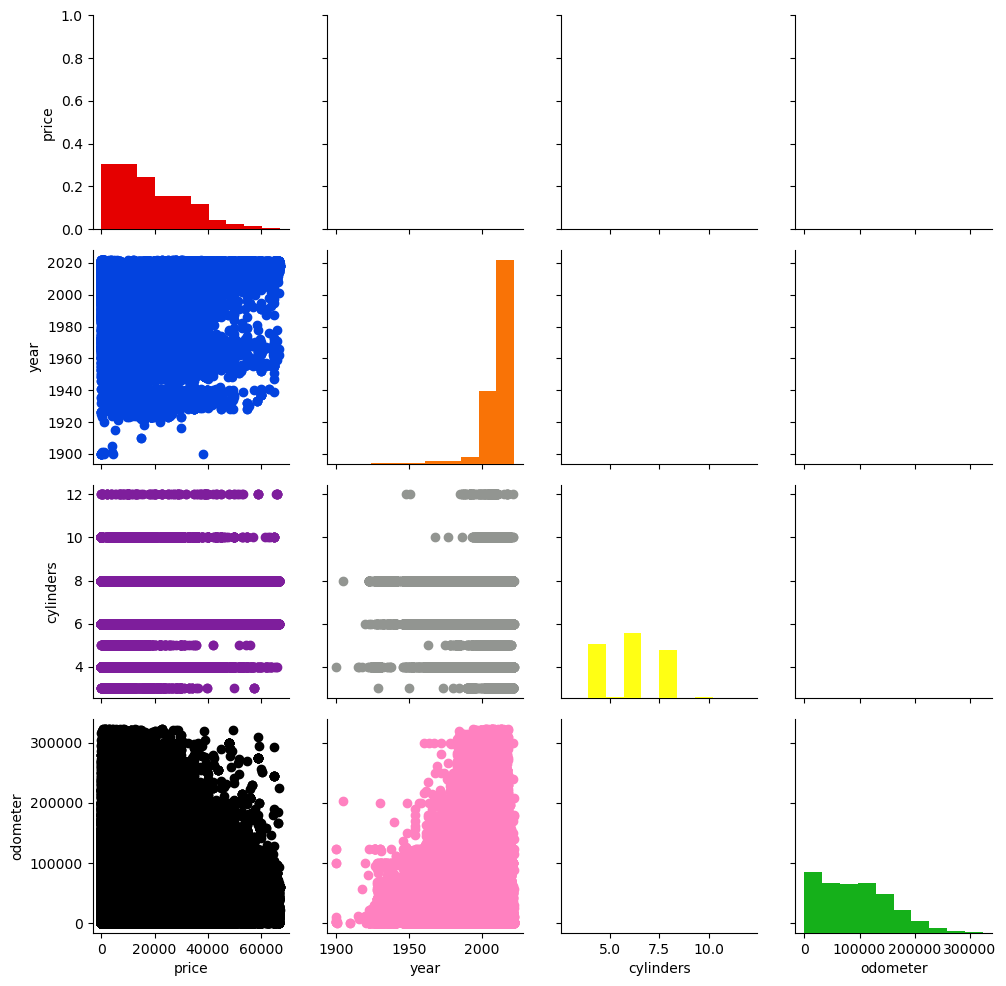

In [20]:
#plot pairplots 
colors = ['xkcd:red', 'xkcd:orange', 'xkcd:yellow', 'xkcd:green', 
    'xkcd:blue', 'xkcd:purple', 'xkcd:grey', 'xkcd:black', 'xkcd:pink']

def my_scatter(x, y, **kwargs):
    kwargs['color'] = colors.pop(0)
    plt.scatter(x, y, **kwargs)

def my_hist(x, **kwargs):
    kwargs['color'] = colors.pop(0)
    plt.hist(x, **kwargs)

plot = sns.PairGrid(cars)
plot.map_diag(my_hist)
plot.map_offdiag(my_scatter)
plot.map_offdiag(my_scatter)

In [21]:
cars['manufacturer'].map({})
cars['model'].map({})
cars['condition'].map({})
cars['fuel'].map({})
cars['title_status'].map({})
cars['transmission'].map({})
cars['drive'].map({})
cars['type'].map({})
cars['paint_color'].map({})

27       NaN
28       NaN
29       NaN
30       NaN
31       NaN
          ..
426875   NaN
426876   NaN
426877   NaN
426878   NaN
426879   NaN
Name: paint_color, Length: 369915, dtype: float64

/var/folders/j9/y4fzjcv16nx07c40s0ygqgn80000gq/T/ipykernel_28746/810954556.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = cars.corr()


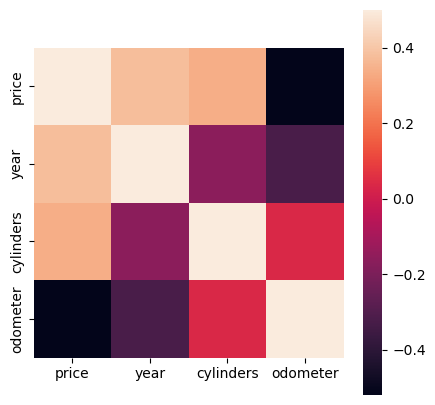

In [22]:
corr_matrix = cars.corr()
f, ax = plt.subplots(figsize=(5, 5))
sns.heatmap(corr_matrix, vmax=.5, square=True);

In [23]:
correlation = cars[['price', 'year', 'odometer', 'cylinders']].corr()['price']
correlation = correlation.drop('price')  # Remove the self-correlation with 'price'
correlation = correlation.sort_values(ascending=False)
print(correlation)

year         0.377146
cylinders    0.339380
odometer    -0.519306
Name: price, dtype: float64


In [24]:
len(cars['manufacturer'].unique())

42

In [25]:
len(cars['model'].unique())

25347

In [26]:
len(cars['condition'].unique())

7

### Modeling

With your (almost?) final dataset in hand, it is now time to build some models.  Here, you should build a number of different regression models with the price as the target.  In building your models, you should explore different parameters and be sure to cross-validate your findings.

In [27]:
X = cars.drop('price', axis=1)
y = cars["price"]


# Scaling numerical data
numerical_features = ['year', 'cylinders', 'odometer']
scaler = StandardScaler()
X[numerical_features] = scaler.fit_transform(X[numerical_features])

# One-hot encode categorical features
encoder = OneHotEncoder(drop='first', sparse=False)
X_categorical = encoder.fit_transform(X[['manufacturer','condition']])

# Combine numerical and one-hot encoded categorical features
X = pd.concat([X[numerical_features], pd.DataFrame(X_categorical, columns=encoder.get_feature_names_out(categorical_features))], axis=1)

/Users/samanthagerber/anaconda3/lib/python3.10/site-packages/sklearn/preprocessing/_encoders.py:828: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [28]:
import numpy as np
x1 = X[numerical_features]
x2 = pd.DataFrame(X_categorical, columns=encoder.get_feature_names_out(categorical_features))
x3 = x1.join(x2)
X = x3[x3['year'].notna()]

In [29]:
X = X.reset_index(drop=True)
y = y.reset_index(drop=True)
# newdf = pd.DataFrame(X, y)
# newdf.columns
new_df=pd.concat([X, y], axis=1).dropna().reset_index(drop=True)
X = new_df.drop('price', axis=1)
y = new_df["price"]
#print(y)

In [30]:
#print(X[numerical_features].shape)
#print(pd.DataFrame(X_categorical, columns=encoder.get_feature_names_out(categorical_features)).shape)

In [31]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [33]:
# Scaling numerical data for training and testing sets
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train[numerical_features] = scaler.fit_transform(X_train[numerical_features])
X_test[numerical_features] = scaler.transform(X_test[numerical_features])

# Initializing the Linear Regression model
linear_model = LinearRegression()

# Fitting the model to the training data
linear_model.fit(X_train, y_train)

# Making predictions on the test set
y_pred = linear_model.predict(X_test)

# Import MSE
from sklearn.metrics import mean_squared_error, r2_score

# Evaluating the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Displaying results
print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')

Mean Squared Error: 86433205.06597403
R-squared: 0.4951715662390782


In [139]:
# Create and train a ridge regression model
ridge = Ridge()
ridge.fit(X_train, y_train)

# Make predictions on the test set
y_pred_ridge = ridge.predict(X_test)

# Evaluate the model
mse_ridge = mean_squared_error(y_test, y_pred_ridge)
r2_ridge = r2_score(y_test, y_pred_ridge)

# Displaying results
print('MSE for Ridge Regression:', mse_ridge)
print(f'R-squared: {r2_ridge}')


MSE for Ridge Regression: 86433298.24813396
R-squared: 0.4951710219921789


In [46]:
# Create and train a lasso regression model
lasso = Lasso()
lasso.fit(X_train, y_train)

# Make predictions on the test set
y_pred_lasso = lasso.predict(X_test)

# Evaluate the model
mse_lasso = mean_squared_error(y_test, y_pred_lasso)
r2_lasso = r2_score(y_test, y_pred_lasso)

# Displaying results
print('MSE for Lasso Regression:', mse_lasso)
print(f'R-squared: {r2_lasso}')

MSE for Lasso Regression: 86436384.1415097
R-squared: 0.4951529982856827


In [47]:
# Extract the coefficients from the trained Lasso model
lasso_coef = lasso.coef_

# Create a DataFrame of feature names and their corresponding coefficients
feature_importances_df = pd.DataFrame({"feature": X_train.columns, "importance": lasso_coef})

# Sort the DataFrame by importance scores
feature_importances_df = feature_importances_df.sort_values(by="importance", ascending=False)

# Print the feature names and their corresponding importance scores
print(feature_importances_df)

                         feature   importance
1                      cylinders  5267.887775
0                           year  3790.141206
36            manufacturer_rover   521.112478
42       manufacturer_volkswagen   262.218015
27            manufacturer_mazda   182.134805
9         manufacturer_chevrolet   114.237027
6               manufacturer_bmw    98.479391
26          manufacturer_lincoln    80.158368
32           manufacturer_nissan    74.522845
22             manufacturer_jeep    57.125256
45                condition_good    32.708840
12            manufacturer_dodge     0.318369
21           manufacturer_jaguar     0.000000
30             manufacturer_mini     0.000000
29          manufacturer_mercury     0.000000
33          manufacturer_pontiac    -0.000000
43            manufacturer_volvo     0.000000
37           manufacturer_saturn     0.000000
24       manufacturer_land rover     0.000000
23              manufacturer_kia     0.000000
19          manufacturer_hyundai  

### Evaluation

With some modeling accomplished, we aim to reflect on what we identify as a high quality model and what we are able to learn from this.  We should review our business objective and explore how well we can provide meaningful insight on drivers of used car prices.  Your goal now is to distill your findings and determine whether the earlier phases need revisitation and adjustment or if you have information of value to bring back to your client.

In [ ]:
#                         feature   importance
# 1                      cylinders  5267.887775
# 0                           year  3790.141206
# 36            manufacturer_rover   521.112478
# 42       manufacturer_volkswagen   262.218015
# 27            manufacturer_mazda   182.134805
# 9         manufacturer_chevrolet   114.237027
# 6               manufacturer_bmw    98.479391
# 26          manufacturer_lincoln    80.158368
# 32           manufacturer_nissan    74.522845
# 22             manufacturer_jeep    57.125256
# 45                condition_good    32.708840
# 12            manufacturer_dodge     0.318369
# 21           manufacturer_jaguar     0.000000
# 30             manufacturer_mini     0.000000
# 29          manufacturer_mercury     0.000000
# 33          manufacturer_pontiac    -0.000000
# 43            manufacturer_volvo     0.000000
# 37           manufacturer_saturn     0.000000
# 24       manufacturer_land rover     0.000000
# 23              manufacturer_kia     0.000000
# 19          manufacturer_hyundai     0.000000
# 11           manufacturer_datsun    -0.000000
# 3        manufacturer_alfa-romeo     0.000000
# 17  manufacturer_harley-davidson     0.000000
# 48             condition_salvage     0.000000
# 14             manufacturer_fiat     0.000000
# 13          manufacturer_ferrari     0.000000
# 39            manufacturer_tesla    -0.000000
# 47                 condition_new    -0.000000
# 4      manufacturer_aston-martin     0.000000
# 10         manufacturer_chrysler    -2.830233
# 18            manufacturer_honda   -10.433843
# 16              manufacturer_gmc   -18.073957
# 31       manufacturer_mitsubishi   -18.095518
# 28    manufacturer_mercedes-benz   -23.165603
# 7             manufacturer_buick   -32.018763
# 38           manufacturer_subaru   -32.836350
# 44                condition_fair   -76.883020
# 15             manufacturer_ford   -82.497345
# 49             condition_unknown   -92.261415
# 25            manufacturer_lexus  -125.093341
# 5              manufacturer_audi  -153.547412
# 40           manufacturer_toyota  -195.023705
# 46            condition_like new  -202.515269
# 35              manufacturer_ram  -213.956706
# 20         manufacturer_infiniti  -229.116080
# 8          manufacturer_cadillac  -299.275508
# 41          manufacturer_unknown  -354.515307
# 34          manufacturer_porsche  -432.440988
# 2                       odometer -6105.844818

Primary Features
1. Cylinders
2. Year
3. Odometer

Secondary Features
1. manufacturer_rover 
2. manufacturer_porsche

Unimporant features
Most of the manufacurer features did not make a difference or made a small difference in the price of the car

### Deployment

Now that we've settled on our models and findings, it is time to deliver the information to the client.  You should organize your work as a basic report that details your primary findings.  Keep in mind that your audience is a group of used car dealers interested in fine tuning their inventory.

Text(0.5, 1.0, 'Distribution of Car Prices')

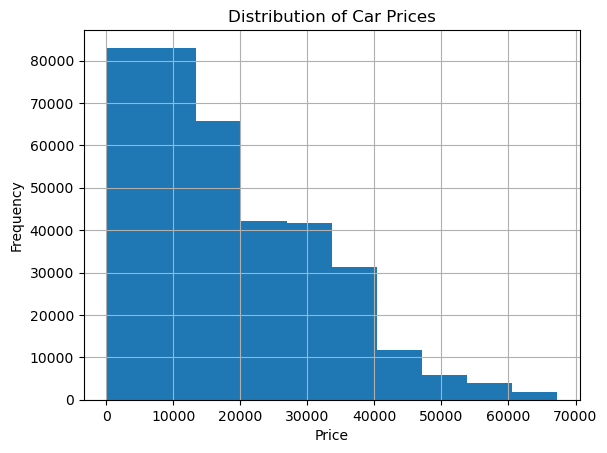

In [53]:
cars['price'].hist()
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.title('Distribution of Car Prices')

Graph analysis: 
The data shows that the prices of used cars is left-skewed which are lower prices. I analyzed the data and the features - both cateogircal and numerical to better undersand what drives the price of a used car. Our goal is to determine which features are most important.

Recommendationss:
Cylinders and Year are the most posiviely correlated features with price of a used car. This means that the more cylinders the car has, the more expensive it is. Also, the newer the car (which corresponds with the greater the year), the more expensive it will be. Odometer is the most negatively correlated feature with used car price. This makes sense because the more miles there are on the car, the less expensive it is when resold.

Next Steps:
To better understand the market for used cars, it could be helpful to use a dataset with sale prices instead of listing prices. Many sellers may list for a higher price than they know they will get, and then seller will negotiate. It would be usedful to understand the exact price cars are selling for. Additionally, surveying used car buyers could help us better understand what they care about. 